# DATA SCIENCE & BUSINESS ANALYTICS TASKS

Submitted by: NAME-MOHD REHAN AZMI

Task 3-Exploratory Data Analysis- Retail

Dataset- SampleSuperstore



Exploratory Data Analysis-It helps to analyze data sets to summarize their main characteristics, often using visual methods.

# Data Description:
    
The data at hand contains items sold by Superstore in different regions of  USA.   

# Domain :
 Retail

# Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data into the notebook

In [2]:
data =pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Basic EDA
* Find the shape of the data, data type of individual columns.
* Check the presence of missing values.
* Descriptive stats of numerical columns.


In [3]:
data.info()    #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# The  datahas 9994 instances with 13 attributes . 3 float type, 2 integer type, 8 object type(Strings in the column)

In [4]:
data.shape

(9994, 13)

The dataset contains 9994 observations of data and 13 columns.

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### -There are no null values in any of the column.

# Checking the statistical summary of dataset

In [6]:
data.describe().T  #five point summary of the continuous attributes
                   # data.describe(include= 'all')


,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


# Exploring and Analyzing dataset

## Different Columns in the dataset

In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Counting number of Segments

In [8]:
data.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

## Counting number of Regions

In [9]:
data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

The Region has been categorized into 4 segments viz. West, East, Central and South

## Counting number of items under Sub-category

In [10]:
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Grouping regions according to profit

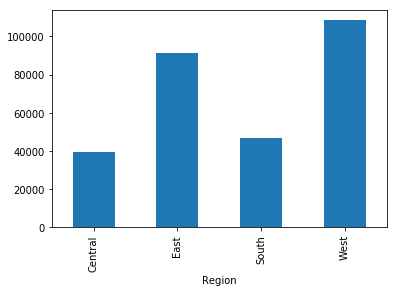

In [11]:
data.groupby("Region").Profit.sum().plot(kind="bar")

In [12]:
data.groupby("Region").Profit.sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

### -- We can see that business is making most of the profit in "West" region

## Grouping the "Category" according to profit

In [13]:
data.groupby("Category").Profit.sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

### Overall profit across various categories

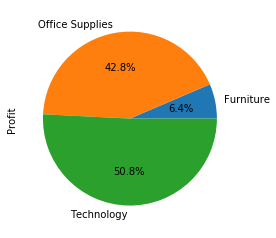

In [14]:
data.groupby("Category").Profit.sum().plot(kind="pie",autopct="%1.1f%%")

### -- Most of the profit is coming from "Technology" category.  

## Grouping the "Sub-Category" according to profit

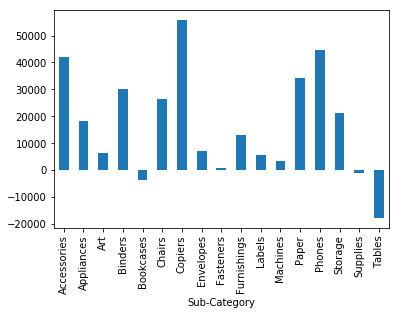

In [15]:
data.groupby("Sub-Category").Profit.sum().plot(kind="bar")


### -- Sales of Tables and Bookcases are making loss

## Grouping profit of Sub-category of furnitures regionwise 

In [16]:
data_central=data[data.Region=="Central"]
data_east=data[data.Region=="East"]
data_west=data[data.Region=="West"]
data_south=data[data.Region=="South"]

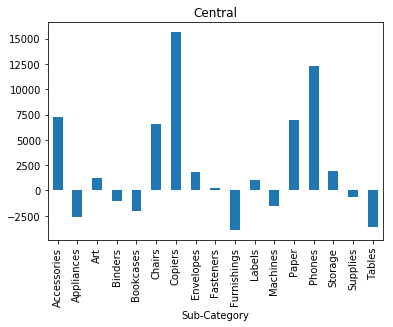

In [17]:
data_central.groupby("Sub-Category").Profit.sum().plot(title="Central",kind="bar")


### --In Central region "Copiers" and "Phones" are making high profit while Applicances, Furnishings and Tables are making loss. 

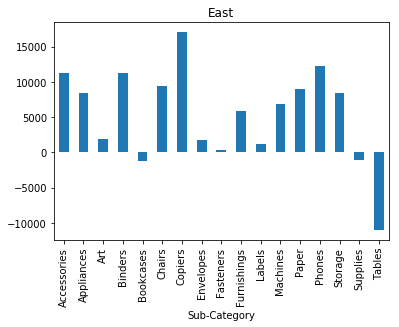

In [18]:
data_east.groupby("Sub-Category").Profit.sum().plot(title="East",kind="bar")

### --In East region "Copiers", "Accessories", "Binders" and "Phones" are making high profit while "Tables" is making huge loss. 

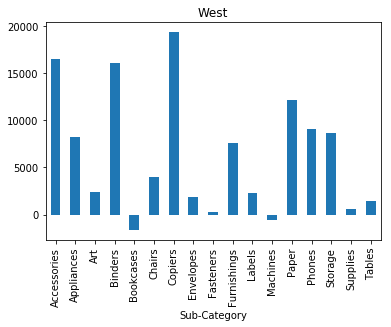

In [19]:
data_west.groupby("Sub-Category").Profit.sum().plot(title="West", kind="bar")

### --In West region "Accessories", "Binder", "Copiers" and "Phones" are making most of the high profit while Bookcases are making loss. 

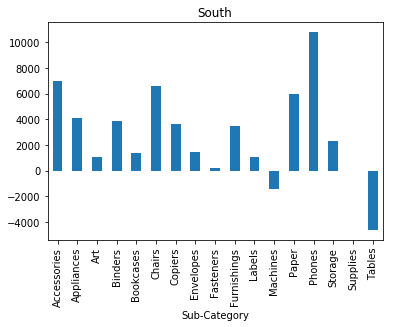

In [20]:
data_south.groupby("Sub-Category").Profit.sum().plot(title="South",kind="bar")

### --In South region "Phones" are making high profit while Tables are making loss. 

### Thus It is seen that tables is in loss in all regions except West

## Profits and Discounts across States

Text(0.5, 1.0, 'Discount')

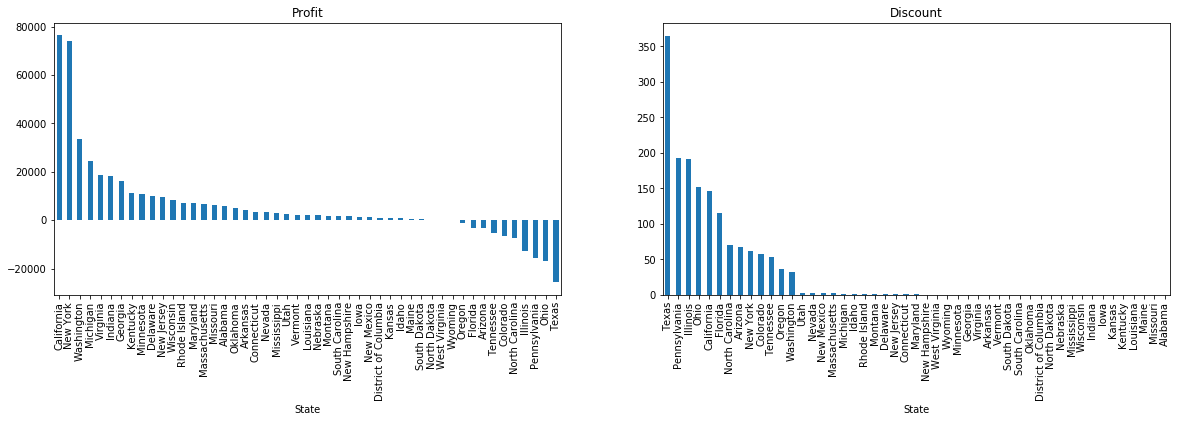

In [21]:
plt.figure(figsize=(20,5))

# Checking for profit
plt.subplot(1,2,1)
data.groupby("State").Profit.sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Profit")

# Checking for Discount
plt.subplot(1,2,2)
data.groupby("State").Discount.sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Discount")

### -- It is seen that state like Texas, Pennsylvania and Ohio all are giving high discounts as they are in loss condition.

### -- California, Michigan and New York are all giving less dicounts

## Sales across States

Text(0.5, 1.0, 'Sales')

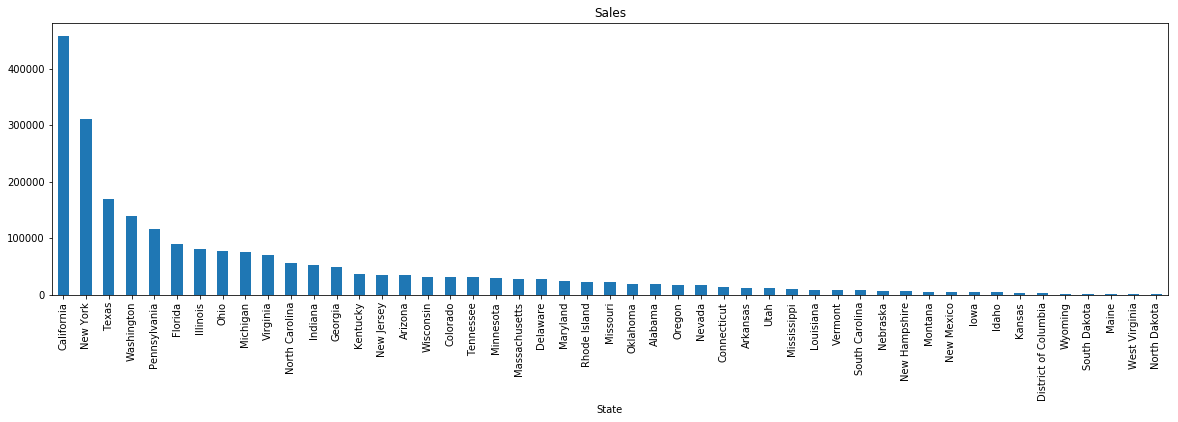

In [22]:
## Checking for sales
plt.figure(figsize=(20,5))

data.groupby("State").Sales.sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Sales")

### --- Sales is high in California, New York etc

# Profit and Discount given on different Sub-category items in Texas

Text(0.5, 1.0, 'Discount')

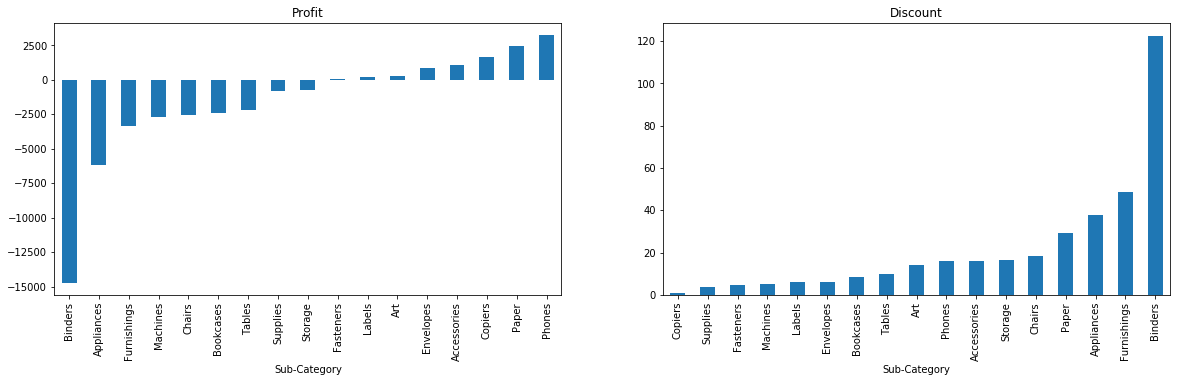

In [23]:
data_texas =data[data.State=="Texas"]

plt.figure(figsize=(20,5))

# Checking for sales
plt.subplot(1,2,1)
data_texas.groupby("Sub-Category").Profit.sum().sort_values().plot(kind="bar")
plt.title("Profit")

# Checking for Discount
plt.subplot(1,2,2)
data_texas.groupby("Sub-Category").Discount.sum().sort_values().plot(kind="bar")
plt.title("Discount")
                                                     

### -- Many products especially Binders, Appliances, Furnishings are not doing well in Texas

# Items showing heavy loss

In [24]:
data_loss =data[data.Profit<0]
data_loss.shape

(1871, 13)

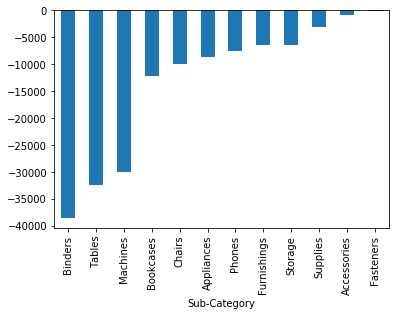

In [25]:
data_loss.groupby("Sub-Category").Profit.sum().sort_values().plot(kind="bar")

### -- Most loss is in selling of "Binders", "Tables", "Machines", "Bookcases"

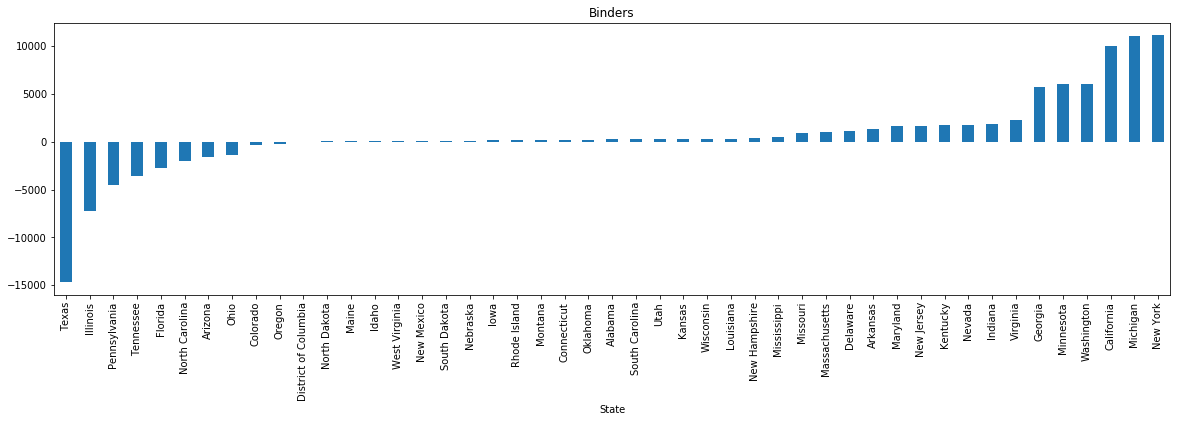

In [26]:
data_Binders = data[data["Sub-Category"]=="Binders"]
plt.figure(figsize=(20,5))
data_Binders.groupby("State").Profit.sum().sort_values().plot(title="Binders", kind="bar")

### -- By selling "Binders" business makes loss in Texas, IlIinois and Pennisylvania.

### -- While business is making profit in New York, Michigan, California etc

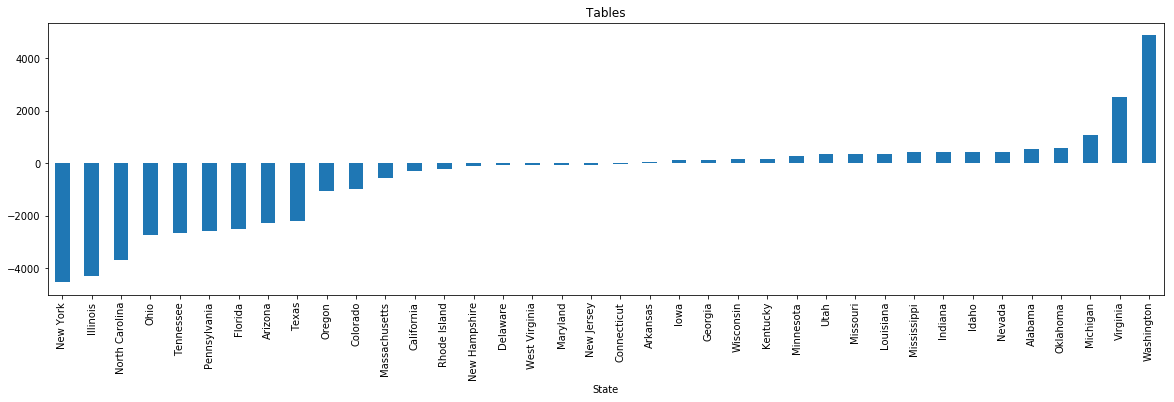

In [27]:
data_tables = data[data["Sub-Category"]=="Tables"]
plt.figure(figsize=(20,5))
data_tables.groupby("State").Profit.sum().sort_values().plot(title="Tables",kind="bar")

### -- New York, Illinois and North Carolina are not doing good by selling "Tables"

### -- While Washington and Virginia are doing very good business in this sub-category.


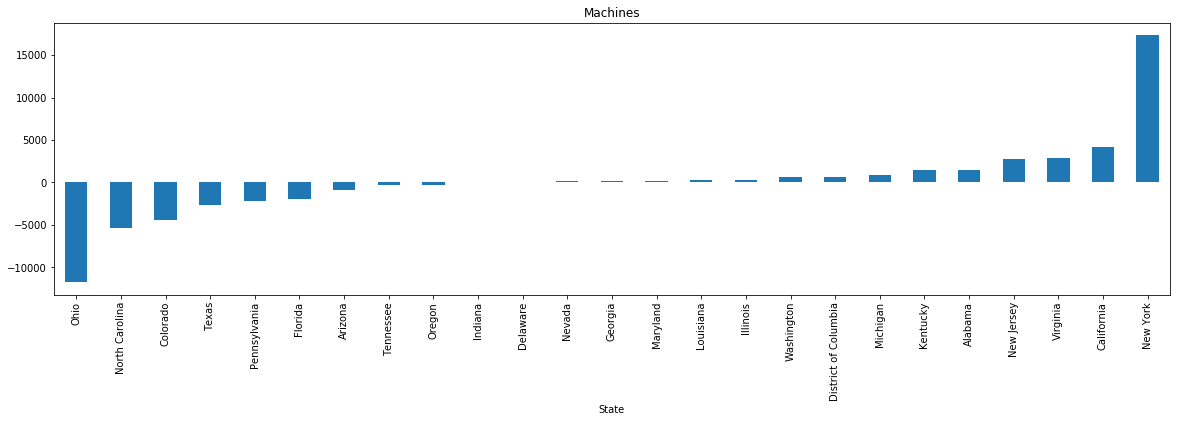

In [28]:
data_Machine = data[data["Sub-Category"]=="Machines"]
plt.figure(figsize=(20,5))
data_Machine.groupby("State").Profit.sum().sort_values().plot(title="Machines",kind="bar")

### -- In Ohio, North Carolina, business is facing loss by selling "Machines". 
### -- While business is making profit in New York and California.

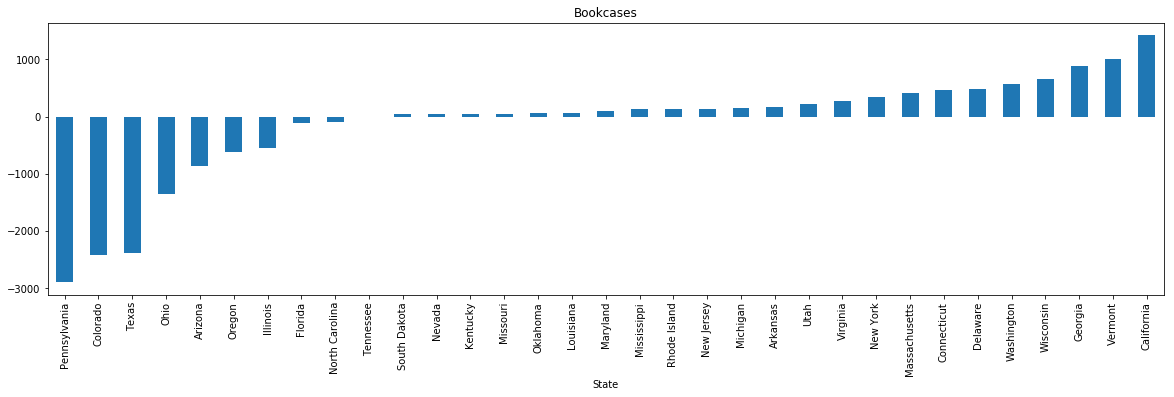

In [29]:
data_book = data[data["Sub-Category"]=="Bookcases"]
plt.figure(figsize=(20,5))
data_book.groupby("State").Profit.sum().sort_values().plot(title="Bookcases",kind="bar")

### Business is facing most loss in Pennyslavania, Colorado and Texas by selling "Bookcases"

###  Profit in California is high.

# Various discounts given on different Sub-category items

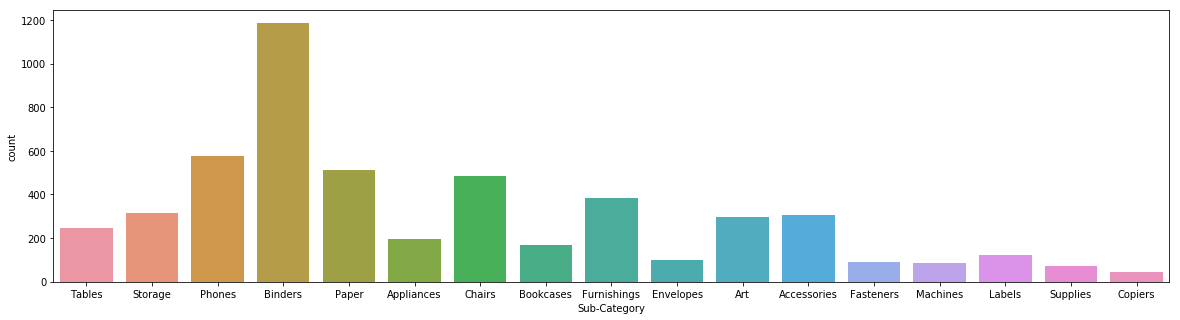

In [30]:
data_discount=data[data.Discount>0]
plt.figure(figsize=(20,5))
sns.countplot(data_discount["Sub-Category"])

### -- Heavy discount is given in "Binders".

# Total Profit across each states giving discounts

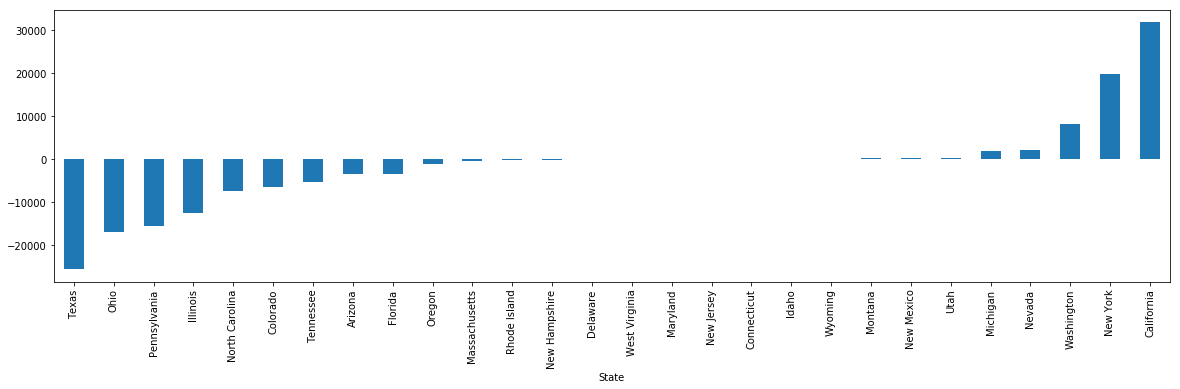

In [31]:
plt.figure(figsize=(20,5))
data_discount.groupby("State").Profit.sum().sort_values().plot(kind="bar")

## Recommendations

* The central region should be taken care of. There the discounts are high and also the losses are high. Need to concentrate     more in this region
* The products like Binders,Papers and Phones are given more discounts.
* Texas,Ohio are all taking more loss inspite of giving high discounts while California, New York makes more profit.
* The product Binders, Tables, Bookcases needs to be given close look in the region where it is going in loss.

